# <center>Algoritmo Genético<center>

Nome: Fernando Veizaga, Gabriel Siqueira

In [1]:
from random import randint,uniform,random
from tqdm import tqdm
import numpy as np

In [2]:
# x = [0, 10]
LIMITE_INFERIOR = 0
LIMITE_SUPERIOR = 10
SIZE_POP = 300 # Tamanho da população
QTD_VAR = 2 # Quantidade de variáveis 
QTD_GERACOES = 1000 # Número de loops 
TAXA_CRUZAMENTO = 0.70
TAXA_MUTACAO = 0.01
QTD_TROCA = 2 # Número de trocas na mutação

In [3]:
def funcao_objetivo(x):
    return -(np.sqrt(x[0])*np.sin(x[0]))*(np.sqrt(x[1])*np.sin(x[1]))

In [4]:
# populacao[individuo, pos] => individuo_1 -> x0 e x1, individuo_2 -> x0 e x1
def geraca_populacao():
    populacao = np.zeros((SIZE_POP,QTD_VAR))
    for individuo in range(SIZE_POP):
        for pos in range(QTD_VAR):
            populacao[individuo,pos] = uniform(LIMITE_INFERIOR, LIMITE_SUPERIOR)
    return populacao

In [5]:
def calcula_fo(pop):
    valor_fo = np.zeros(SIZE_POP) # Valor da função objetivo para cada individuo
    for individuo in range(SIZE_POP):
        valor_fo[individuo] = funcao_objetivo(pop[individuo,:]) # x0 e x1 de um individuo
    return valor_fo

In [6]:
def fitness(valor_fo):
    return valor_fo # Fitness é a própria função objetivo

In [7]:
def selecao(valor_fitness):
    pos = np.random.choice(range(SIZE_POP),  2 ,replace=False) # Escolhe dois números aleatórios para ser comparado no valor de fitness 
    valor = valor_fitness[pos[0]]<valor_fitness[pos[1]]
    if valor == True:
        return  pos[0]
    else: 
        return pos[1]

In [8]:
def cruzamento(pai1,pai2):
    x = random()
    filho1 = x*pai1+(1-x)*pai2
    filho2 = (1-x)*pai1+x*pai2
    return filho1,filho2

In [9]:
def mutacao(individuo):
    pos = np.random.choice(range(QTD_VAR),  QTD_TROCA ,replace=False)
    individuo[pos[0]] = individuo[pos[1]]
    individuo[pos[1]] = individuo[pos[0]]
    return individuo

In [10]:
import matplotlib.pyplot as plt

In [11]:
def main_ga():
    pop = geraca_populacao()
    fo = calcula_fo(pop)
    print(pop)
    fit = fitness(fo)
    melhor_fo = np.zeros(QTD_GERACOES)
    melhor_ind_geracao = np.zeros((QTD_GERACOES, QTD_VAR))
    for geracao in range(QTD_GERACOES):
        new_pop = np.empty((0, QTD_VAR))
        for i in range(round((SIZE_POP) / 2)):
            pai1 = 0
            pai2 = 0
            while pai1 == pai2:
                pai1 = selecao(fit)
                pai2 = selecao(fit)
            if random() < TAXA_CRUZAMENTO:
                filho1, filho2 = cruzamento(pop[pai1, :], pop[pai2, :]) 
                if random() < TAXA_MUTACAO:    
                    filho1 = mutacao(filho1)
                    filho2 = mutacao(filho2)  
                new_pop = np.vstack([new_pop, filho1, filho2])     
            else:
                pais = np.vstack([pop[pai1, :], pop[pai2, :]])
                new_pop = np.vstack([new_pop, pais])
        pop = new_pop    
        fo = calcula_fo(pop)
        fit = fitness(fo)
        min_fo = min(fo)
        melhor_fo[geracao] = min_fo
        pos_min_fo = np.where(fo == min_fo)

    
    plt.plot(melhor_fo)
    plt.xlim(0, QTD_GERACOES)
    plt.ylabel('Gerações')
    plt.ylabel('Melhor Custo')
    plt.title('Evolução da função objetivo - GA')
    plt.grid(True)
    plt.show()
    

    return pop[pos_min_fo,:][0,0]

[[1.06052133e+00 8.22837873e+00]
 [2.84993901e+00 2.36607045e+00]
 [5.40413719e+00 7.63021298e+00]
 [3.47337399e+00 9.77840061e-01]
 [4.27420686e+00 7.82638108e+00]
 [2.74659736e+00 3.54706319e-01]
 [5.50297748e+00 4.71357782e+00]
 [9.76280505e+00 9.12745173e+00]
 [7.34555092e+00 3.16485204e+00]
 [1.05526936e-01 7.59195139e-01]
 [9.03939987e+00 3.46613199e+00]
 [1.57084260e+00 8.01792253e+00]
 [3.54514586e+00 7.31023593e+00]
 [6.79112004e+00 4.13486592e+00]
 [5.63005499e+00 4.32143953e+00]
 [6.88658998e+00 2.29449009e+00]
 [5.70793542e+00 3.16958216e+00]
 [2.88963437e+00 5.34563135e+00]
 [7.25977956e+00 3.86582547e+00]
 [7.95020627e+00 6.68202012e+00]
 [6.11443204e+00 8.10762274e+00]
 [7.53239860e+00 7.55715798e+00]
 [3.40585961e+00 8.59799814e+00]
 [5.31245399e+00 6.36021199e+00]
 [6.85753961e+00 8.44319132e+00]
 [8.68277083e+00 8.46732363e+00]
 [5.24017313e+00 6.62856950e+00]
 [1.33491998e+00 6.23614064e+00]
 [3.52801651e+00 4.48395798e+00]
 [1.00403407e+00 3.03753027e-02]
 [8.520786

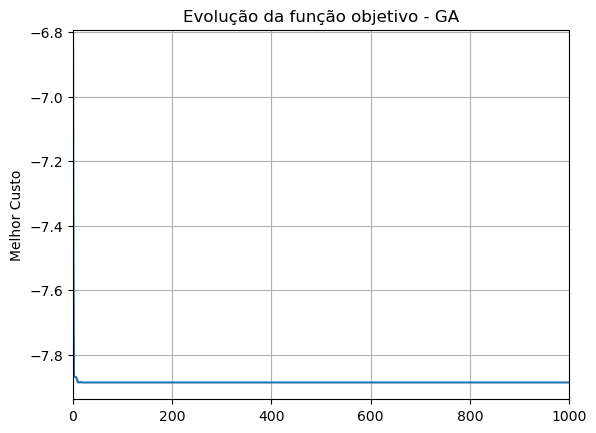

In [12]:
minimo = main_ga()

In [13]:
minimo

array([7.91705268, 7.91705268])